DESCRIPTION
Identify the level of income qualification needed for the families in Latin America.
Problem Statement Scenario:
Many social programs have a hard time ensuring that the right people are given enough aid. It’s tricky when a program focuses on the poorest segment of the population. This segment of the population can’t provide the necessary income and expense records to prove that they qualify.
In Latin America, a popular method called Proxy Means Test (PMT) uses an algorithm to verify income qualification. With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling or the assets found in their homes to
classify them and predict their level of need.
While this is an improvement, accuracy remains a problem as the region’s population grows and poverty declines.
The Inter-American Development Bank (IDB)believes that new methods beyond traditional econometrics, based on a dataset of Costa Rican household characteristics, might help improve PMT’s performance.
Following actions should be performed:
•	Identify the output variable.
•	Understand the type of data.
•	Check if there are any biases in your dataset.
•	Check whether all members of the house have the same poverty level.
•	Check if there is a house without a family head.
•	Set poverty level of the members and the head of the house within a family.
•	Count how many null values are existing in columns.
•	Remove null value rows of the target variable.
•	Predict the accuracy using random forest classifier.
•	Check the accuracy using random forest with cross validation.

In [1]:
# Import Libraries
from pandas import read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#Upload dataset
train_df = pd.read_csv("IncomeQual_train.csv")
test_df = pd.read_csv("IncomeQual_test.csv")

In [3]:
train_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [4]:
# Identify the output/Target variable
for i in train_df.columns:
    if i not in test_df.columns:
        print("Label is {}".format(i))

Label is Target


In [5]:
# Understand the type of data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [6]:
train_df.shape

(9557, 143)

In [7]:
test_df.shape

(23856, 142)

We have mixed data types
float64(8), int64(130), object(5)

In [8]:
# Identify the 5 object datatype features
for i in train_df.columns:
    a = train_df[i].dtype
    if a == object:
        print(i)

Id
idhogar
dependency
edjefe
edjefa


In [9]:
#train_df.drop(['Id','idhogar'],axis=1,inplace=True)
#test_df.drop(['Id','idhogar'],axis=1,inplace=True)

In [10]:
train_df['dependency'].value_counts()

yes          2192
no           1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             378
.25           260
3             236
4             100
.75            98
.2             90
.40000001      84
1.3333334      84
2.5            77
5              24
1.25           18
3.5            18
.80000001      18
2.25           13
.71428573      12
1.75           11
1.2            11
.83333331      11
.22222222      11
.2857143        9
1.6666666       8
.60000002       8
6               7
.16666667       7
Name: dependency, dtype: int64

In [11]:
def map(i):
    if i == 'yes':
        return(float(1))
    elif i == 'no':
        return(float(0))
    else:
        return(float(i))

In [12]:
train_df['dependency'] = train_df['dependency'].apply(map)
train_df['edjefe'] = train_df['edjefe'].apply(map)
train_df['edjefa'] = train_df['edjefa'].apply(map)

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(11), int64(130), object(2)
memory usage: 10.4+ MB


In [14]:
test_df['dependency'] = test_df['dependency'].apply(map)
test_df['edjefe'] = test_df['edjefe'].apply(map)
test_df['edjefa'] = test_df['edjefa'].apply(map)

In [15]:
# Delete Features with Zero Variance
'''for column in train_df.columns:
    check = len(np.unique(train_df[column]))
    if check == 1:
        train_df.drop(column,axis=1,inplace=True)
        test_df.drop(column,axis=1,inplace=True)'''

'for column in train_df.columns:\n    check = len(np.unique(train_df[column]))\n    if check == 1:\n        train_df.drop(column,axis=1,inplace=True)\n        test_df.drop(column,axis=1,inplace=True)'

In [16]:
# Find columns with Null values
nullcolumn_int = train_df.select_dtypes(np.int64).isnull().sum()
nullcolumn_int[nullcolumn_int>0]

Series([], dtype: int64)

In [17]:
nullcolumn_float = train_df.select_dtypes(np.float64).isnull().sum()
nullcolumn_float[nullcolumn_float>0]

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

There are 5 columns with null values:
v2a1: Monthly rent payment
v18q1: number of tablets household owns
rez_esc: Years behind in school
meaneduc: average years of education for adults (18+)
SQBmeaned: square of the mean years of education of adults (>=18) in the household

In [18]:
# 1. Identify v2a1 null value relation with other relevant columns
rent_analy = train_df[train_df['v2a1'].isnull()].head()
columns=['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']
rent_analy[columns]

,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5
2,1,0,0,0,0
13,1,0,0,0,0
14,1,0,0,0,0
26,1,0,0,0,0
32,1,0,0,0,0


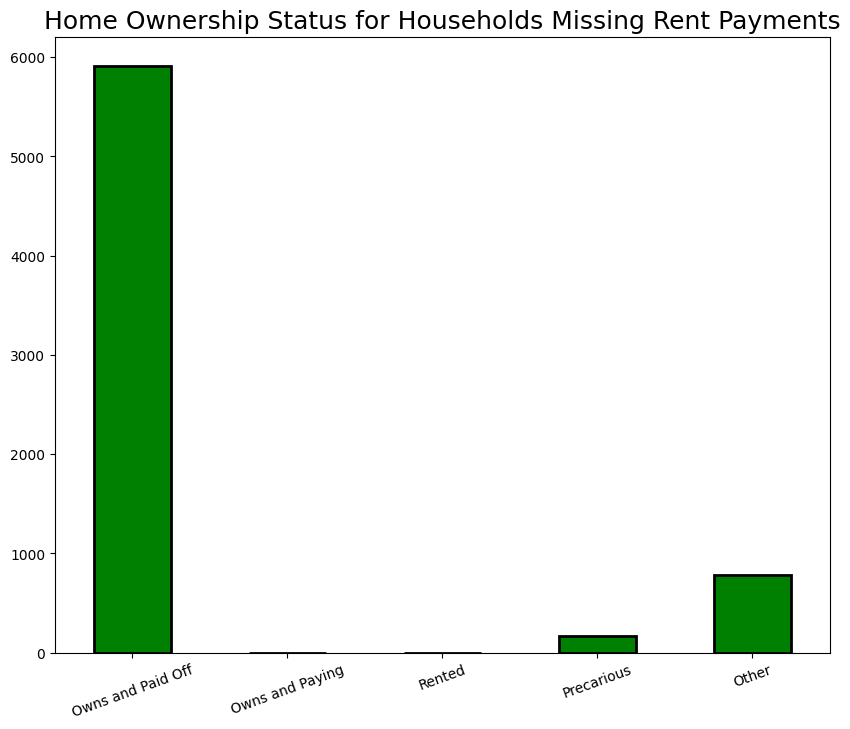

In [19]:
# Columns related to rentpayment
rent_col = [val for val in train_df if val.startswith('tipo')]
train_df.loc[train_df['v2a1'].isnull(),rent_col].sum().plot.bar(figsize=(10,8),color='green',edgecolor='k',linewidth=2);
plt.xticks([0,1,2,3,4], ['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'], rotation=20);
plt.title('Home Ownership Status for Households Missing Rent Payments', size = 18);

In [20]:
# From above bar graph it is clear majority of the null values due to owned house, so lets fill null values with zero
for df in [train_df, test_df]:
    df['v2a1'].fillna(value=0,inplace=True)
train_df[['v2a1']].isnull().sum()

v2a1    0
dtype: int64

In [26]:
# 2. Identify v18q1 null value relation with other relevant columns
Head = train_df.loc[train_df['parentesco1']==1].copy()
Head.groupby('v18q')['v18q1'].apply(lambda x:x.isnull().sum())

v18q
0    2318
1       0
Name: v18q1, dtype: int64

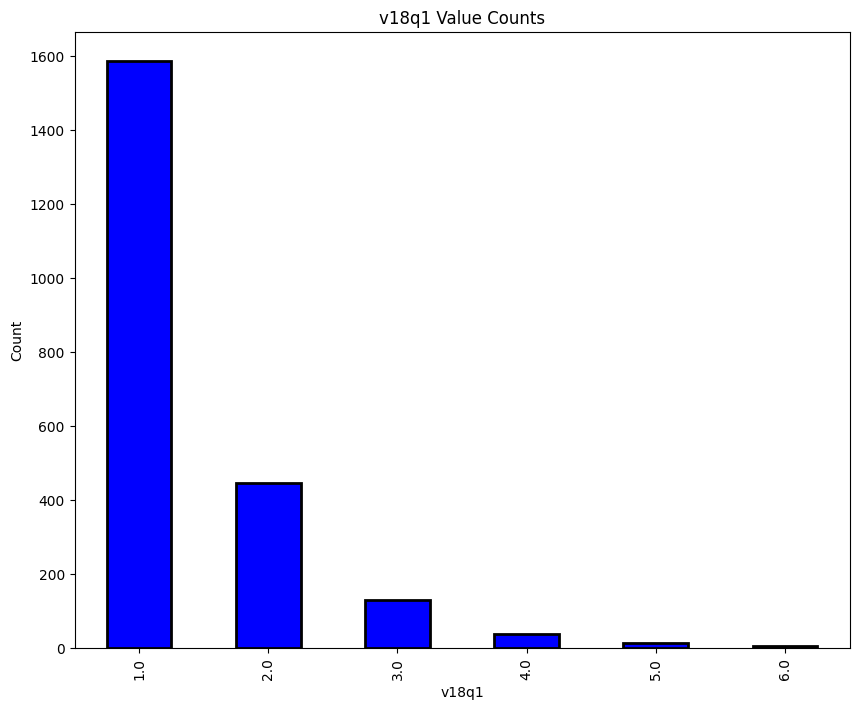

In [27]:
col='v18q1'
train_df[col].value_counts().sort_index().plot.bar(figsize=(10,8),color='blue',edgecolor='k',linewidth=2)
plt.xlabel(f'{col}');
plt.title(f'{col} Value Counts');
plt.ylabel('Count');
plt.show();

In [28]:
#Looking at the above data it makes sense that when owns a tablet column is 0, there will be no number of tablets household owns.
#Lets add 0 for all the null values.
for df in [train_df,test_df]:
    df['v18q1'].fillna(value=0,inplace=True)
train_df[['v18q1']].isnull().sum()

v18q1    0
dtype: int64

In [29]:
# 3. Identify rez_esc null value relation with other relevant columns
train_df[train_df['rez_esc'].notnull()]['age'].describe()

count    1629.000000
mean       12.258441
std         3.218325
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

In [33]:
#From the above , we see that when min age is 7 and max age is 17 for Years, then the 'behind in school' column has a value.

train_df[train_df['rez_esc'].isnull()]['age'].describe()

count    7928.000000
mean       38.833249
std        20.989486
min         0.000000
25%        24.000000
50%        38.000000
75%        54.000000
max        97.000000
Name: age, dtype: float64

In [34]:
train_df.loc[(train_df['rez_esc'].isnull() & ((train_df['age']>7) & (train_df['age']<17)))]['age'].describe()
#There is one value that has Null for the 'behind in school' column with age between 7 and 17 

count     1.0
mean     10.0
std       NaN
min      10.0
25%      10.0
50%      10.0
75%      10.0
max      10.0
Name: age, dtype: float64

In [35]:
train_df[(train_df['age'] ==10) & train_df['rez_esc'].isnull()].head()
#train_df[(train_df['Id'] =='ID_f012e4242')].head()
#there is only one member in household for the member with age 10 and who is 'behind in school'. This explains why the member is behind in school.

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
2514,ID_f012e4242,160000.0,0,6,0,1,1,1,1.0,0,...,0,100,9,121,1,2.25,0.25,182.25,100,4


In [36]:
#from above we see that  the 'behind in school' column has null values 
# Lets use the above to fix the data
for df in [train_df, test_df]:
    df['rez_esc'].fillna(value=0, inplace=True)
train_df[['rez_esc']].isnull().sum()

rez_esc    0
dtype: int64

In [37]:
# 4. Identify meaneduc null value relation with other relevant columns
meaneduc_analy = train_df[train_df['meaneduc'].isnull()].head()
column = ['edjefe','edjefa','instlevel1','instlevel2']
meaneduc_analy[column][meaneduc_analy[column]['instlevel1']>0].describe()

,edjefe,edjefa,instlevel1,instlevel2
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [38]:
# From the above, we find that meaneduc is null when no level of education is 0
for df in [train_df,test_df]:
    df['meaneduc'].fillna(value=0,inplace=True)
train_df['meaneduc'].isnull().sum()

0

In [39]:
# 5. Identify SQBmeaned null value relation with other relevant columns
SQBmeaned_analy = train_df[train_df['SQBmeaned'].isnull()].head()
column = ['edjefe','edjefa','instlevel1','instlevel2']
SQBmeaned_analy[column][SQBmeaned_analy[column]['instlevel1']>0].describe()

,edjefe,edjefa,instlevel1,instlevel2
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [40]:
# From the above, we find that meaneduc is null when no level of education is 0
for df in [train_df,test_df]:
    df['SQBmeaned'].fillna(value=0,inplace=True)
train_df['SQBmeaned'].isnull().sum()

0

In [41]:
null_count = train_df.isnull().sum()
null_count[null_count>0].sort_values(ascending=False)

Series([], dtype: int64)

In [42]:
# Groupby the household and figure out the number of unique values
sametarget = train_df.groupby('idhogar')['Target'].apply(lambda x:x.nunique()==1)

# Households where targets are not all equal
notsametarget = sametarget[sametarget!=True]
print('There are {} number of households where family members do not have the same target'.format(len(notsametarget)))

There are 85 number of households where family members do not have the same target


In [43]:
# Lets check one household
train_df[train_df['idhogar'] == notsametarget.index[0]][['idhogar','parentesco1','Target']]

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


In [57]:
'''Lets use Target value of the parent record (head of the household) and update rest. But before that lets check
if all families has a head'''
household_head = train_df.groupby('idhogar')['parentesco1'].sum()

# Find households without a head
household_nohead = train_df.loc[train_df['idhogar'].isin(household_head[household_head==0].index),:]
print("There are {} number of households without a head".format(household_nohead['idhogar'].nunique()))

There are 15 number of households without a head


In [58]:
# Find households without a head and where Target value are different
household_nohead_notequal = household_nohead.groupby('idhogar')['Target'].apply(lambda x: x.nunique()==1)
print("There are {} number of households with no head & different target".format(sum(household_nohead_notequal==False)))

There are 0 number of households with no head & different target


In [60]:
#Lets fix the data
#Set poverty level of the members and the head of the house within a family.
# Iterate through each household
for household in notsametarget.index:
    new_target = int(train_df[(train_df['idhogar'] == household) & (train_df['parentesco1'] == 1.0)]['Target'])
    # Set the correct label for all members in the household
    train_df.loc[train_df['idhogar'] == household, 'Target'] = new_target

# Groupby the household and figure out the number of unique values
all_equal = train_df.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 0 households where the family members do not all have the same target.


In [61]:
# Lets check for any bias in the dataset
#Lets look at the dataset and plot head of household and Target
# 1 = extreme poverty 2 = moderate poverty 3 = vulnerable households 4 = non vulnerable households 
target_counts = Head['Target'].value_counts().sort_index()
target_counts

1     222
2     442
3     355
4    1954
Name: Target, dtype: int64

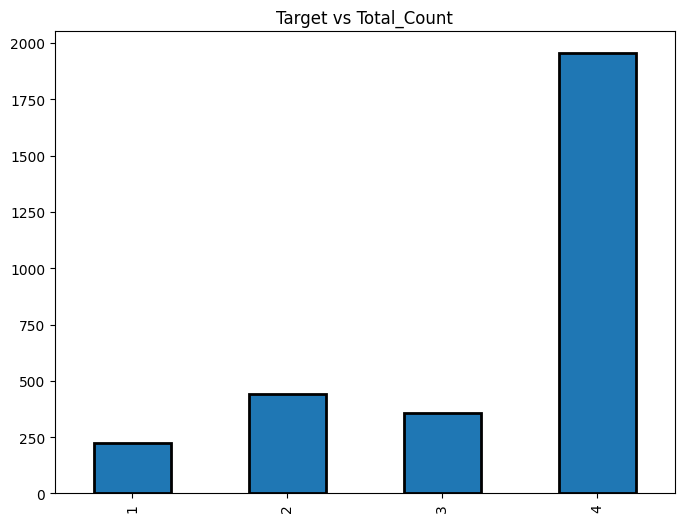

In [62]:
target_counts.plot.bar(figsize = (8, 6),linewidth = 2,edgecolor = 'k',title="Target vs Total_Count")
plt.show()

Extreme poverty is the smallest count in the train dataset. The dataset is biased.

In [63]:
# Lets look at the Squared Variables and remove them
sqr_cols = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']
for df in [train_df,test_df]:
    df.drop(columns = sqr_cols, inplace = True)

train_df.shape

(9557, 134)

In [64]:
id_ = ['Id', 'idhogar', 'Target']

ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone']

ind_ordered = ['rez_esc', 'escolari', 'age']

hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [65]:
#Check for redundant household variables
heads = train_df.loc[train_df['parentesco1'] == 1, :]
heads = heads[id_ + hh_bool + hh_cont + hh_ordered]
heads.shape

(2973, 98)

In [72]:
# Create correlation matrix
corr_matrix = heads.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

/tmp/ipykernel_83/2672702943.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

In [67]:
corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9]

,r4t3,tamhog,tamviv,hhsize,hogar_total
r4t3,1.000000,0.996884,0.929237,0.996884,0.996884
tamhog,0.996884,1.000000,0.926667,1.000000,1.000000
tamviv,0.929237,0.926667,1.000000,0.926667,0.926667
hhsize,0.996884,1.000000,0.926667,1.000000,1.000000
hogar_total,0.996884,1.000000,0.926667,1.000000,1.000000


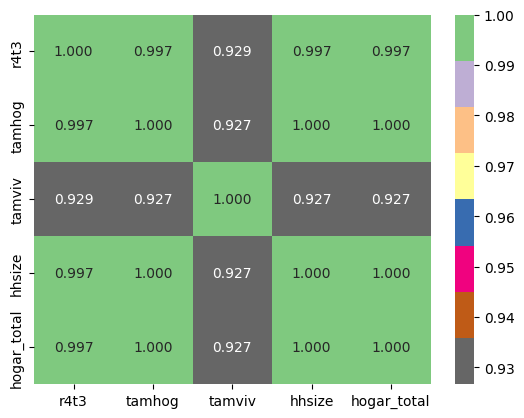

In [68]:
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9],
            annot=True, cmap = plt.cm.Accent_r, fmt='.3f');

# There are several variables here having to do with the size of the house:
# r4t3, Total persons in the household
# tamhog, size of the household
# tamviv, number of persons living in the household
# hhsize, household size
# hogar_total, # of total individuals in the household
# These variables are all highly correlated with one another.

In [69]:
cols=['tamhog', 'hogar_total', 'r4t3']
for df in [train_df, test_df]:
    df.drop(columns = cols,inplace=True)

train_df.shape

(9557, 131)

In [70]:
#Check for redundant Individual variables
ind = train_df[id_ + ind_bool + ind_ordered]
ind.shape

(9557, 39)

In [71]:
# Create correlation matrix
corr_matrix = ind.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

/tmp/ipykernel_83/2566326322.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['female']

In [100]:
# This is simply the opposite of male! We can remove the male flag.
for df in [train_df, test_df]:
    df.drop(columns = 'male',inplace=True)

train_df.shape

(9557, 130)

In [101]:
#lets check area1 and area2 also
# area1, =1 zona urbana 
# area2, =2 zona rural 
#area2 redundant because we have a column indicating if the house is in a urban zone

for df in [train_df, test_df]:
    df.drop(columns = 'area2',inplace=True)

train_df.shape

(9557, 129)

In [102]:
#Finally lets delete 'Id', 'idhogar'
cols=['Id','idhogar']
for df in [train_df, test_df]:
    df.drop(columns = cols,inplace=True)

train_df.shape

(9557, 127)

In [103]:
# Predict the accuracy using random forest classifier.
x_features=train_df.iloc[:,0:-1]
y_features=train_df.iloc[:,-1]
print(x_features.shape)
print(y_features.shape)

(9557, 126)
(9557,)


In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

x_train,x_test,y_train,y_test=train_test_split(x_features,y_features,test_size=0.2,random_state=1)
rmclassifier = RandomForestClassifier()

In [105]:
rmclassifier.fit(x_train,y_train)

RandomForestClassifier()

In [107]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, 
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier(n_estimators=10)

In [108]:
y_predict = rmclassifier.predict(x_test)

In [109]:
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.948744769874477
[[ 136    2    0   19]
 [   0  285    1   31]
 [   0    1  191   41]
 [   0    2    1 1202]]
              precision    recall  f1-score   support

           1       1.00      0.87      0.93       157
           2       0.98      0.90      0.94       317
           3       0.99      0.82      0.90       233
           4       0.93      1.00      0.96      1205

    accuracy                           0.95      1912
   macro avg       0.98      0.90      0.93      1912
weighted avg       0.95      0.95      0.95      1912



In [111]:
y_predict_testdata = rmclassifier.predict(test_df)

In [112]:
y_predict_testdata

array([4, 4, 4, ..., 4, 4, 4])

In [113]:
# Check the accuracy using random forest with cross validation.
from sklearn.model_selection import KFold,cross_val_score
# Checking the score using default 10 trees
seed=7
kfold=KFold(n_splits=5,random_state=seed,shuffle=True)

rmclassifier=RandomForestClassifier(random_state=10,n_jobs = -1)
print(cross_val_score(rmclassifier,x_features,y_features,cv=kfold,scoring='accuracy'))
results=cross_val_score(rmclassifier,x_features,y_features,cv=kfold,scoring='accuracy')
print(results.mean()*100)

[0.94246862 0.94979079 0.94557823 0.94243851 0.94976452]
94.60081361157272


In [114]:
# Checking the score using 100 trees
num_trees= 100

rmclassifier=RandomForestClassifier(n_estimators=100, random_state=10,n_jobs = -1)
print(cross_val_score(rmclassifier,x_features,y_features,cv=kfold,scoring='accuracy'))
results=cross_val_score(rmclassifier,x_features,y_features,cv=kfold,scoring='accuracy')
print(results.mean()*100)

[0.94246862 0.94979079 0.94557823 0.94243851 0.94976452]
94.60081361157272


In [118]:
y_predict_testdata = rmclassifier.predict(test_df)
y_predict_testdata

array([4, 4, 4, ..., 4, 4, 4])

Looking at the accuracy score, RandomForestClassifier with cross validation has the highest accuracy score of 94.60%
To get a better sense of what is going on inside the RandomForestClassifier model, lets visualize how our model uses the different features and which features have greater effect.

In [116]:
rmclassifier.fit(x_features,y_features)
labels = list(x_features)
feature_importances = pd.DataFrame({'feature': labels, 'importance': rmclassifier.feature_importances_})
feature_importances=feature_importances[feature_importances.importance>0.015]
feature_importances.head()

,feature,importance
0,v2a1,0.018653
2,rooms,0.025719
9,r4h2,0.020706
10,r4h3,0.019808
11,r4m1,0.015271


Text(0.5, 0, 'Importance')

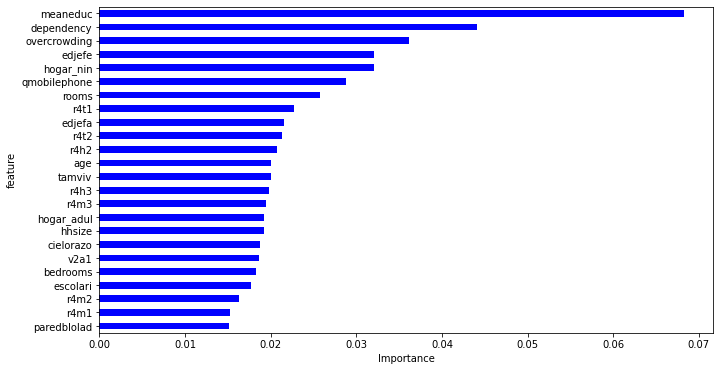

In [117]:
feature_importances.sort_values(by=['importance'], ascending=True, inplace=True)
feature_importances['positive'] = feature_importances['importance'] > 0
feature_importances.set_index('feature',inplace=True)
feature_importances.head()

feature_importances.importance.plot(kind='barh', figsize=(11, 6),color = feature_importances.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

From the above figure, meaneduc,dependency,overcrowding has significant influence on the model.